In [1]:
# Import necessary libraries
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np 

# Setup for inline plotting
%matplotlib inline

In [2]:
# Define audio paths
techno_file = '../data/raw/techno/Jayron - FIYA! (EXTENDED MIX).wav'
house_file = '../data/raw/house/Kiss It Better.mp3'
dubstep_file = '../data/raw/dubstep/ALLEYCVT - GLITCH [OFFICIAL VISUALIZER].mp3'

In [3]:
# Narrow focus for audio loading

# Techno
t, sr_t = librosa.load(techno_file, offset=55, duration=20)

print(f"Loaded 30 seconds of {techno_file}")
print(f"Sample Rate: {sr_t}")
print(f"Total Samples: {len(t)}")

Loaded 30 seconds of ../data/raw/techno/Jayron - FIYA! (EXTENDED MIX).wav
Sample Rate: 22050
Total Samples: 441000


In [4]:
# House
h, sr_h = librosa.load(house_file, offset=60, duration=20)

print(f"Loaded 30 seconds of {house_file}")
print(f"Sample Rate: {sr_h}")
print(f"Total Samples: {len(h)}")

Loaded 30 seconds of ../data/raw/house/Kiss It Better.mp3
Sample Rate: 22050
Total Samples: 441000


In [5]:
# Dubstep
d, sr_d = librosa.load(dubstep_file, offset=60, duration=20)

print(f"Loaded 30 seconds of {dubstep_file}")
print(f"Sample Rate: {sr_d}")
print(f"Total Samples: {len(d)}")

Loaded 30 seconds of ../data/raw/dubstep/ALLEYCVT - GLITCH [OFFICIAL VISUALIZER].mp3
Sample Rate: 22050
Total Samples: 441000


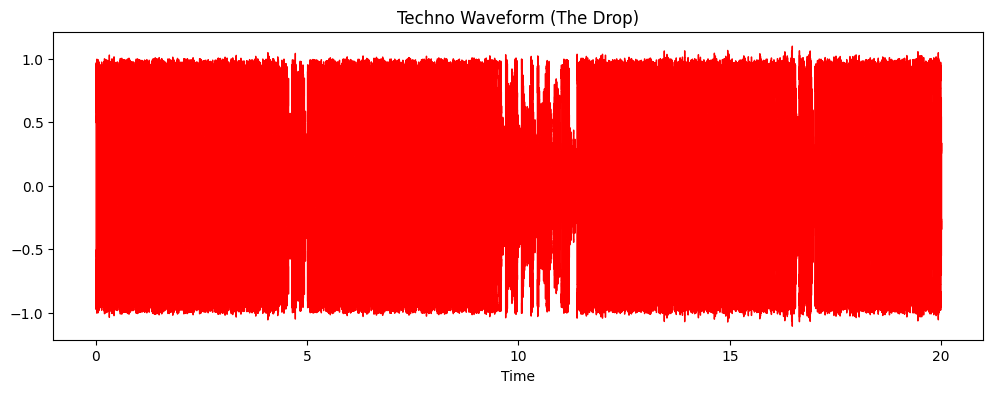

In [6]:
# Visualize the waveform - Techno
plt.figure(figsize=(12, 4))
librosa.display.waveshow(t, sr=sr_t, color='red')
plt.title("Techno Waveform (The Drop)")
plt.show()

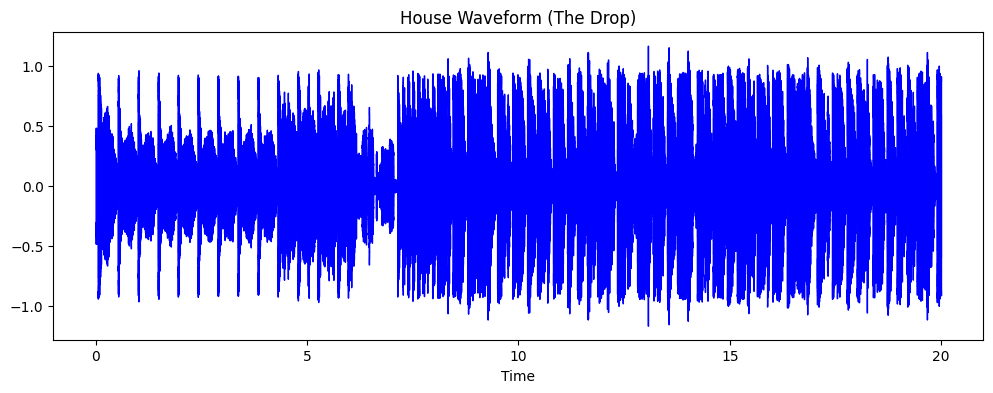

In [7]:
# Visualize the waveform - House
plt.figure(figsize=(12, 4))
librosa.display.waveshow(h, sr=sr_h, color='blue')
plt.title("House Waveform (The Drop)")
plt.show()

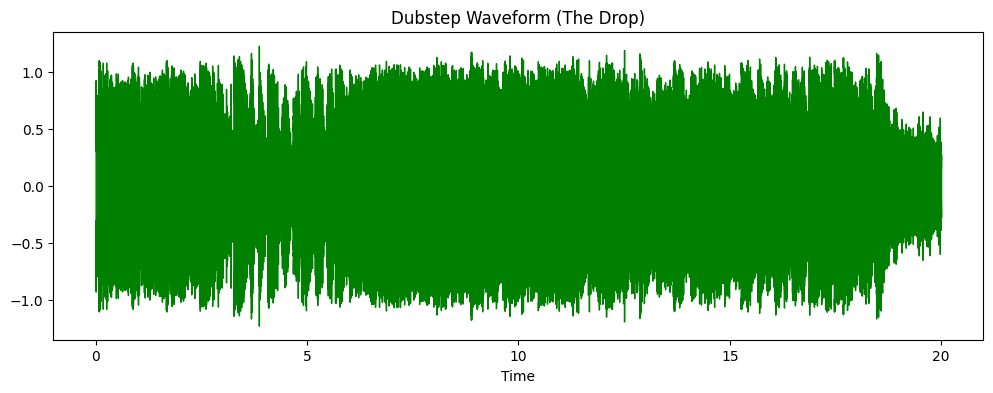

In [8]:
# Visualize the waveform - Dubstep
plt.figure(figsize=(12, 4))
librosa.display.waveshow(d, sr=sr_d, color='green')
plt.title("Dubstep Waveform (The Drop)")
plt.show()

In [9]:
# Extract BPM
# Calculate Strength of the Onsets (Beats) - Techno
onset_env = librosa.onset.onset_strength(y=t, sr=sr_t)
tempo, _ = librosa.beat.beat_track(onset_envelope=onset_env, sr=sr_t)

print(f"Estimated Tempo: {tempo.item():.2f} BPM")

Estimated Tempo: 161.50 BPM


In [10]:
# Calculate Strength of the Onsets (Beats) - House
onset_env = librosa.onset.onset_strength(y=h, sr=sr_h)
tempo, _ = librosa.beat.beat_track(onset_envelope=onset_env, sr=sr_h)

print(f"Estimated Tempo: {tempo.item():.2f} BPM")

Estimated Tempo: 129.20 BPM


In [11]:
# Calculate Strength of the Onsets (Beats) - Dubstep
onset_env = librosa.onset.onset_strength(y=d, sr=sr_d)
tempo, _ = librosa.beat.beat_track(onset_envelope=onset_env, sr=sr_d)

print(f"Estimated Tempo: {tempo.item():.2f} BPM")

Estimated Tempo: 152.00 BPM


In [12]:
genres = {'Techno': techno_file, 'House': house_file, 'Dubstep': dubstep_file}

for name, path in genres.items():
    audio, rate = librosa.load(path, offset=60, duration=20)
    t, _ = librosa.beat.beat_track(y=audio, sr=rate)
    print(f"{name} Tempo: {t.item():.2f} BPM")

Techno Tempo: 161.50 BPM
House Tempo: 129.20 BPM
Dubstep Tempo: 76.00 BPM
